In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# reading the ames training data as ames

ames = pd.read_csv("datasets/ames_housing.csv")

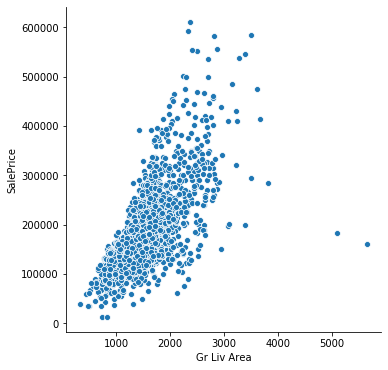

In [3]:
#  Looking at the distribution of Overall 


sns.pairplot(ames, x_vars=["Gr Liv Area"], y_vars=["SalePrice"], height=5);

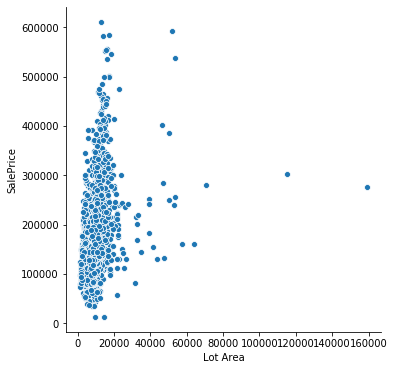

In [4]:
#  Looking at the distribution of Overall 


sns.pairplot(ames, x_vars=["Lot Area"], y_vars=["SalePrice"], height=5);

In [5]:
# Dropping the outliers gr living area.

ames.drop(labels=[960, 1885], axis=0, inplace=True)

In [6]:
# Dropping the outliers Full Bath

ames.drop(labels=[1566, 1605], axis=0, inplace=True)

In [7]:
# Dropping the outliers Bedroom AbvGr

ames.drop(labels=[858,1571, 1308, 191], axis=0, inplace=True)

In [8]:
# Dropping the outliers kitchen

ames.drop(labels=1359, axis=0, inplace=True)

In [9]:
# there are null values in the Garage Cars. Since we are going to use this column, we will drop the null values.

ames.dropna(subset=["Garage Cars"], inplace=True)

In [10]:
# Dropping the outliers lot area.

ames.drop(labels=[471, 694], axis=0, inplace=True)

In [11]:
# Dropping the outliers lot area.

ames.drop(labels=[1854], axis=0, inplace=True)

In [12]:
# creating a dummy dataframe on MS Subclass
# Dropping the first column, which is Dwelling Type 20. Everything will be compared based on Type 20.

subclass_dum = pd.get_dummies(ames["MS SubClass"], drop_first=True, prefix="Dwelling Type", prefix_sep=" ").astype("int")

#  concatinating the dummy dataframe with the original dataframe (Ames)

ames = pd.concat([ames, subclass_dum], axis =1)

# dropping Type 150 column because test dataset does not have it
subclass_dum.drop(columns="Dwelling Type 150", inplace=True)

In [13]:
# creating a dummy dataframe on MS Zonning
# Dropping the first column, which is Zonning Class A. Everything will be compared based on Class A.

zonning_dum = pd.get_dummies(ames["MS Zoning"], drop_first=True, prefix="Zone Class", prefix_sep=" ").astype("int")

#  concatinating zonning_dum dataframe with the original dataframe (Ames)

ames = pd.concat([ames, zonning_dum], axis =1)

In [14]:
# creating a dummy dataframe on Neighborhood
# Dropping the first column, which is Bloomington Heights . Everything will be compared based on Bloomington Heights.

neighborhood_dum = pd.get_dummies(ames["Neighborhood"], drop_first=True, prefix="Neighborhood", prefix_sep=" ").astype("int")

#  concatinating neighborhood_dum dataframe with the original dataframe (Ames)

ames = pd.concat([ames, neighborhood_dum], axis =1)

# dropping these 2 columns because test dataset does not have them.
neighborhood_dum.drop(columns=['Neighborhood GrnHill', 'Neighborhood Landmrk'], inplace=True)

Creating interaction columns below.

In [15]:
ames["Overall Qual * Overall Cond"] = ames["Overall Qual"] *  ames["Overall Cond"]

In [16]:
ames["Overall Qual * Gr Liv Area"] = ames["Overall Qual"] *  ames["Gr Liv Area"]

In [17]:
ames["Overall Qual * Full Bath"] = ames["Overall Qual"] *  ames["Full Bath"]

In [18]:
ames["Overall Qual * Bedroom AbvGr"] = ames["Overall Qual"] *  ames["Bedroom AbvGr"]

In [19]:
ames["Overall Qual * Kitchen AbvGr"] = ames["Overall Qual"] *  ames["Kitchen AbvGr"]

In [20]:
ames["Overall Qual * Garage Cars"] = ames["Overall Qual"] *  ames["Garage Cars"]

In [21]:
ames["Overall Cond * Gr Liv Area"] = ames["Overall Cond"] *  ames["Gr Liv Area"]

In [22]:
ames["Overall Cond * Full Bath"] = ames["Overall Cond"] *  ames["Full Bath"]

In [23]:
ames["Overall Cond * Bedroom AbvGr"] = ames["Overall Cond"] *  ames["Bedroom AbvGr"]

In [24]:
ames["Overall Cond * Kitchen AbvGr"] = ames["Overall Cond"] *  ames["Kitchen AbvGr"]

In [25]:
ames["Overall Cond * Garage Cars"] = ames["Overall Cond"] *  ames["Garage Cars"]

In [26]:
ames["Full Bath * Bedroom AbvGr"] = ames["Full Bath"] *  ames["Bedroom AbvGr"]

In [27]:
ames["Gr Liv Area * Bedroom AbvGr"] = ames["Gr Liv Area"] *  ames["Bedroom AbvGr"]

In [28]:
ames["Gr Liv Area * Lot Area"] = ames["Gr Liv Area"] *  ames["Lot Area"]

In [29]:
ames["Bedroom AbvGr * Lot Area"] = ames["Bedroom AbvGr"] *  ames["Lot Area"]

In [30]:
ames["Full Bath * Lot Area"] = ames["Full Bath"] *  ames["Lot Area"]

In [31]:
ames["Kitchen AbvGr * Lot Area"] = ames["Kitchen AbvGr"] *  ames["Lot Area"]

In [32]:
# Creating features and assigning them to X. Assigning Salesprice as y (dependent variable)
features = ["Kitchen AbvGr * Lot Area","Gr Liv Area * Lot Area","Lot Area","Bedroom AbvGr * Lot Area","Full Bath * Lot Area","Overall Qual * Overall Cond","Overall Qual * Gr Liv Area","Overall Qual * Full Bath","Overall Qual * Bedroom AbvGr","Overall Qual * Kitchen AbvGr","Overall Qual * Garage Cars","Overall Cond * Gr Liv Area","Overall Cond * Full Bath","Overall Cond * Bedroom AbvGr","Overall Cond * Kitchen AbvGr","Overall Cond * Garage Cars","Full Bath * Bedroom AbvGr","Gr Liv Area * Bedroom AbvGr","Overall Qual", "Overall Cond" , "Fireplaces","Gr Liv Area","Full Bath", "Bedroom AbvGr", "Kitchen AbvGr", "Garage Cars"] +list(subclass_dum.columns) +list(zonning_dum.columns)+list(neighborhood_dum.columns) 


X = ames[features]
y = ames["SalePrice"]

print(X.shape)
print(y.shape)

(2038, 71)
(2038,)


In [33]:
# Spliting the variable into train and test data using train_test_split method.
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [34]:
# Instantiating the model
lr = LinearRegression()

# Fiting model to our data.
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# calculating Rˆ2 score based on the train data.
lr.score(X_train, y_train)

0.8962099297606396

In [36]:
# calculating Rˆ2 score based on the test data.
lr.score(X_test, y_test)

0.9036967130942849

In [37]:
# creating predictions
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [38]:
# MSE of training

mse_train = round((mean_squared_error(y_train, y_pred_train)),2)
mse_train

680657661.7

In [39]:
# MSE of testing

mse_test = round((mean_squared_error(y_test, y_pred_test)),2)
mse_test

516176528.52

In [40]:
# RMSE of training

round((mean_squared_error(y_train, y_pred_train, squared=False)),2)

26089.42

In [41]:
# RMSE of testing

round((mean_squared_error(y_test, y_pred_test, squared=False)),2)

22719.52

In [42]:
ames_test= pd.read_csv("datasets/test.csv")

In [43]:
# creating a dummy dataframe on MS Subclass in ames_test
# Dropping the first column, which is Dwelling Type 20. Everything will be compared based on Type 20.

ames_test_subclass_dum = pd.get_dummies(ames_test["MS SubClass"], drop_first=True, prefix="Dwelling Type", prefix_sep=" ").astype("int")

#  concatinating the dummy dataframe with the test dataframe (ames_test)

ames_test = pd.concat([ames_test, ames_test_subclass_dum], axis =1)

In [44]:
# creating a dummy dataframe on MS Zonning
# Dropping the first column, which is Zonning Class A. Everything will be compared based on Class A.

ames_test_zonning_dum = pd.get_dummies(ames_test["MS Zoning"], prefix="Zone Class", prefix_sep=" ").astype("int")



#  concatinating the dummy dataframe with the test dataframe (ames_test)

ames_test = pd.concat([ames_test, ames_test_zonning_dum], axis =1)


In [45]:
# creating a dummy dataframe on Neighborhood
# Dropping the first column, which is Bloomington Heights . Everything will be compared based on Bloomington Heights.

ames_test_neighborhood_dum = pd.get_dummies(ames_test["Neighborhood"], drop_first=True, prefix="Neighborhood", prefix_sep=" ").astype("int")

#  concatinating the dummy dataframe with the test dataframe (ames_test)

ames_test = pd.concat([ames_test, ames_test_neighborhood_dum], axis =1)



We are creating same interaction columns for ames_test dataframe that we created for ames dataframe.

In [46]:
ames_test["Overall Qual * Overall Cond"] = ames_test["Overall Qual"] *  ames_test["Overall Cond"]

In [47]:
ames_test["Overall Qual * Gr Liv Area"] = ames_test["Overall Qual"] *  ames_test["Gr Liv Area"]

In [48]:
ames_test["Overall Qual * Full Bath"] = ames_test["Overall Qual"] *  ames_test["Full Bath"]

In [49]:
ames_test["Overall Qual * Bedroom AbvGr"] = ames_test["Overall Qual"] *  ames_test["Bedroom AbvGr"]

In [50]:
ames_test["Overall Qual * Kitchen AbvGr"] = ames_test["Overall Qual"] *  ames_test["Kitchen AbvGr"]

In [51]:
ames_test["Overall Qual * Garage Cars"] = ames_test["Overall Qual"] *  ames_test["Garage Cars"]

In [52]:
ames_test["Overall Cond * Gr Liv Area"] = ames_test["Overall Cond"] *  ames_test["Gr Liv Area"]

In [53]:
ames_test["Overall Cond * Full Bath"] = ames_test["Overall Cond"] *  ames_test["Full Bath"]

In [54]:
ames_test["Overall Cond * Bedroom AbvGr"] = ames_test["Overall Cond"] *  ames_test["Bedroom AbvGr"]

In [55]:
ames_test["Overall Cond * Kitchen AbvGr"] = ames_test["Overall Cond"] *  ames_test["Kitchen AbvGr"]

In [56]:
ames_test["Overall Cond * Garage Cars"] = ames_test["Overall Cond"] *  ames_test["Garage Cars"]

In [57]:
ames_test["Full Bath * Bedroom AbvGr"] = ames_test["Full Bath"] *  ames_test["Bedroom AbvGr"]

In [58]:
ames_test["Gr Liv Area * Bedroom AbvGr"] = ames_test["Gr Liv Area"] *  ames_test["Bedroom AbvGr"]

In [59]:
ames_test["Gr Liv Area * Lot Area"] = ames_test["Gr Liv Area"] *  ames_test["Lot Area"]

In [60]:
ames_test["Bedroom AbvGr * Lot Area"] = ames_test["Bedroom AbvGr"] *  ames_test["Lot Area"]

In [61]:
ames_test["Full Bath * Lot Area"] = ames_test["Full Bath"] *  ames_test["Lot Area"]

In [62]:
ames_test["Kitchen AbvGr * Lot Area"] = ames_test["Kitchen AbvGr"] *  ames_test["Lot Area"]

In [63]:
# Creating features and assigning them to X.
test_features = list(ames_test_neighborhood_dum.columns)+list(ames_test_zonning_dum.columns)+list(ames_test_subclass_dum.columns)+["Kitchen AbvGr * Lot Area","Gr Liv Area * Lot Area","Lot Area","Bedroom AbvGr * Lot Area","Full Bath * Lot Area","Overall Qual * Overall Cond","Overall Qual * Gr Liv Area","Overall Qual * Full Bath","Overall Qual * Bedroom AbvGr","Overall Qual * Kitchen AbvGr","Overall Qual * Garage Cars","Overall Cond * Gr Liv Area","Overall Cond * Full Bath","Overall Cond * Bedroom AbvGr","Overall Cond * Kitchen AbvGr","Overall Cond * Garage Cars","Full Bath * Bedroom AbvGr","Gr Liv Area * Bedroom AbvGr","Overall Qual", "Overall Cond" , "Fireplaces","Gr Liv Area","Full Bath", "Bedroom AbvGr", "Kitchen AbvGr", "Garage Cars"]
test_X = ames_test[test_features]

print(test_X.shape)

(878, 71)


In [64]:
# predicting salesprices

test_y_predict = lr.predict(test_X)

In [65]:
# creating a dataframe with ID and salesprice columns

model_13 = pd.DataFrame({"Id":ames_test["Id"], "SalePrice":test_y_predict})

In [66]:
# exporting the dataframe as csv

model_13.to_csv("./datasets/model_13_submission.csv", index=False)